<a href="https://colab.research.google.com/github/realBagher/Image_Processing_OpenCV/blob/main/Non-Local-Mean-Denoising/Non_Local_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Non-Local-Mean Filter?

Non-local means (NLM) is a filter used in image processing for denoising an image. It replaces the value of each pixel with a weighted average of the values of the pixels in the image that are similar to it. The NLM filter is based on the principle that pixels with similar neighborhoods are likely to have similar values.

The NLM filter works by comparing the neighborhoods of each pixel in the image to find similar pixels. The similarity between two pixels is measured by comparing the distances between the neighborhoods of the two pixels. The neighborhoods are defined as patches of pixels around the pixel being evaluated.

The NLM filter applies a weighted average of the values of the pixels in the image that are similar to the pixel being evaluated. The weight of each pixel is determined by the similarity between the neighborhoods of the two pixels. Pixels with similar neighborhoods have a higher weight in the weighted average, while pixels with dissimilar neighborhoods have a lower weight.

The NLM filter is effective in denoising images because it takes into account the spatial information of the image. The filter does not only consider the similarity of pixel values, but also the similarity of the spatial layout of the pixels. The NLM filter can remove different types of noise from an image, including Gaussian noise and salt-and-pepper noise.

*In summary, the NLM filter is an effective method for denoising an image by using the spatial information of the image to remove random variations in pixel intensity.*

**In OpenCV, the NLM filter is implemented as the function ```cv2.fastNlMeansDenoising()```. This function applies the NLM filter to an image and returns the denoised image as output. The function takes several parameters, including the input image, the strength of the filter, and the size of the patch to be compared.**

## The Algorithm:

The idea behind the NLM algorithm is to replace each pixel in an image with a weighted average of all pixels in the image. However, unlike traditional averaging filters, the NLM algorithm takes into account the similarity between pixels, instead of just their proximity. This makes the NLM algorithm more effective in preserving image details while still reducing noise.

The algorithm works by computing the similarity between a small patch around each pixel and all other patches in the image. The similarity is computed using a distance metric, such as the Euclidean distance or the cosine distance. The patches with the highest similarity are then used to compute the weighted average for the pixel being filtered.

The NLM algorithm also includes a parameter called the "bandwidth" that controls the amount of smoothing applied to the image. A higher bandwidth will result in more smoothing, while a lower bandwidth will preserve more detail






In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import pandas as pd 

In [ ]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

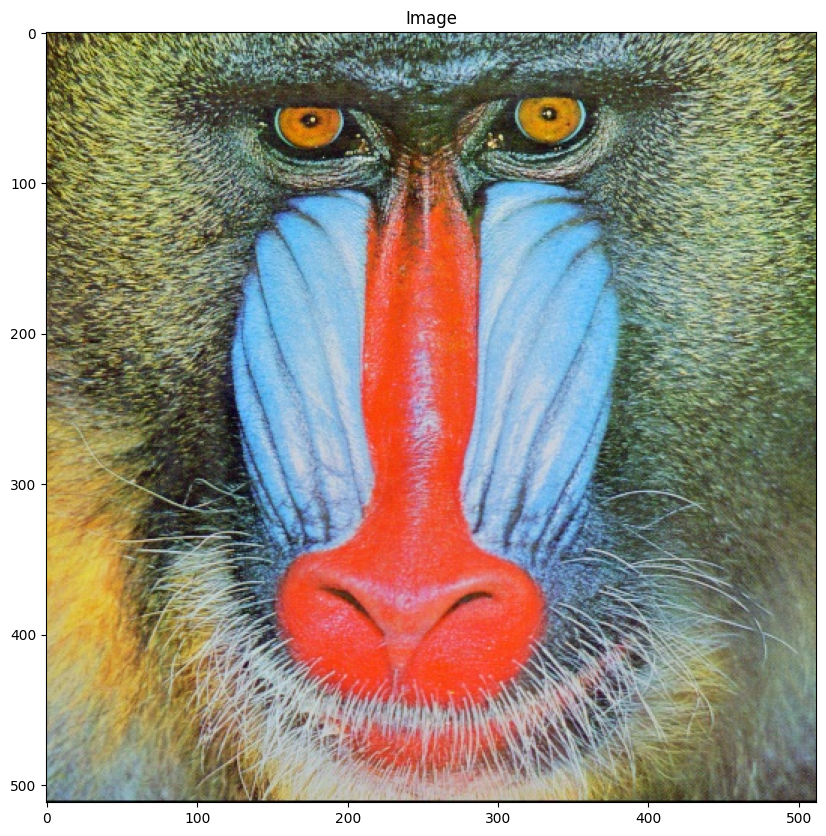

In [ ]:
baboon = cv2.imread('/content/baboon.jpg')
imshow(image=baboon)

In [ ]:
gray = cv2.cvtColor(baboon, cv2.COLOR_BGR2GRAY)

In [ ]:
imshow(image=gray)

now we produce gausian noise and added it to the picture 

In [ ]:

mean = 0
variance = 0.25
sigma = np.sqrt(variance)
gaussian = np.random.normal(mean, sigma, gray.shape)


In [ ]:
gaussian.shape

(512, 512)

In [ ]:
gaussian = gaussian.astype('uint8')

In [ ]:
gaussian

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   1, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
noisy_img = cv2.add(gray, gaussian)

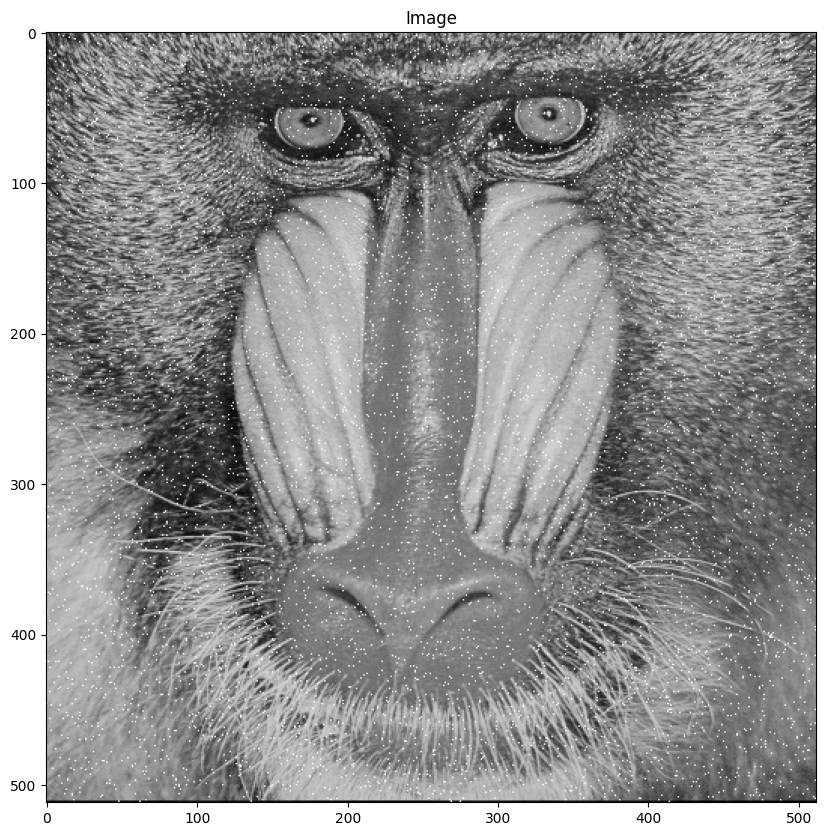

In [ ]:
imshow(image=noisy_img)

we use open cv NLM denoising functions with given values 

In [ ]:
nlm_img = cv2.fastNlMeansDenoising(noisy_img,9,21,21)

In [ ]:
imshow(image=nlm_img)


we convolve the 3by 3 kernel with picture to get local mean filtering 

In [ ]:
kernel1 = 1/9 * np.ones((3,3))
 
identity = cv2.filter2D(src=gray, ddepth=-1, kernel=kernel1)

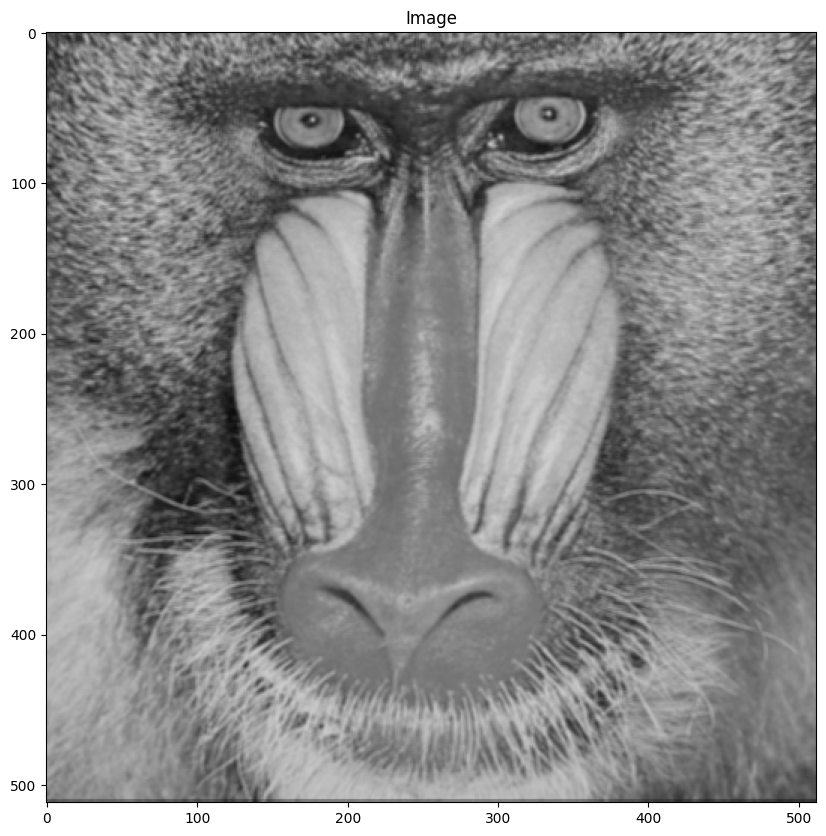

In [ ]:
imshow(image=identity)

In [ ]:
nlm_img.shape

(512, 512)

In [ ]:
baboon.shape

(512, 512, 3)

Helper function to calculate MSE 

In [ ]:
def mse(image1, image2):
    """Calculates the Mean Squared Error (MSE) between two gray images"""
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions")
    diff = np.subtract(image1.astype(np.float32), image2.astype(np.float32))
    squared_diff = np.square(diff)
    mse = np.mean(squared_diff)
    return mse

MSE for Non Local Mean method

In [ ]:
mse(gray,nlm_img)

304.62094

MSE for  Local Mean methon 

In [ ]:
mse(gray,identity)

314.4507

MSE for pure noised image 

In [ ]:
mse(gray,noisy_img)

400.15237

PSNR Helper function 

In [ ]:

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))


Thre

In [ ]:
psnr(gray,nlm_img)

30.764516784076147

In [ ]:
psnr(gray,identity)

29.953038018164754

In [ ]:
psnr(gray,noisy_img)

44.40446323489582